<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/70_stacked_area_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch
from matplotlib.ticker import FuncFormatter

In [ ]:
assessments_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/vector/geonb_property_assessment.feather',
    known_hash='37879e95a234085249c23b7217ac4654e02730a845d64671a2ea1a87b6e94652'
)

In [ ]:
result = (
    gpd.read_feather(assessments_file)
    .groupby('county', observed=False)
    [['2018', '2019', '2020', '2021', '2022', '2023', '2024']]
    .agg('mean')
)

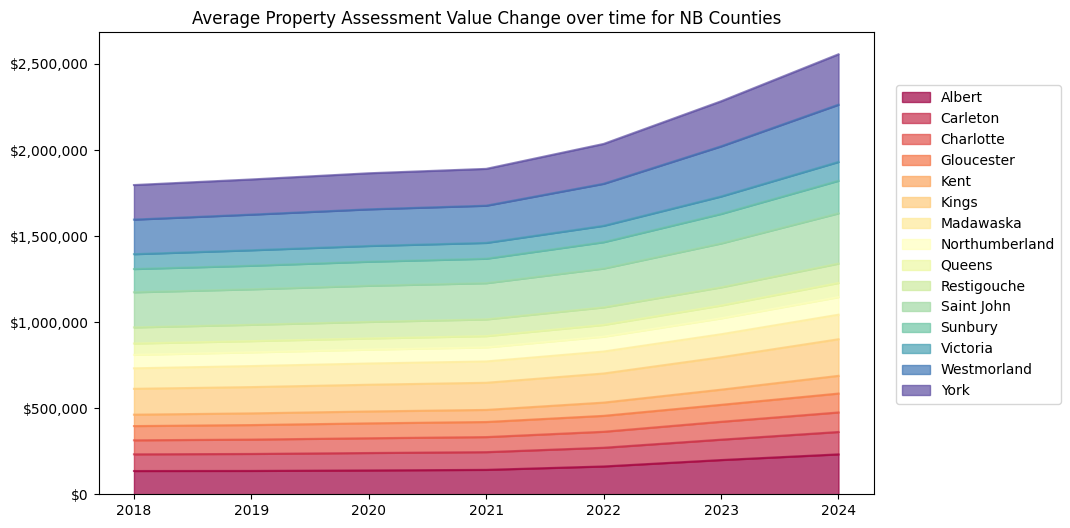

In [ ]:
ax = result.T.plot(kind='area', stacked=True, figsize=(10, 6), alpha=0.7, cmap='Spectral')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))
plt.legend(bbox_to_anchor=(1.02, 0.9), loc='upper left')
plt.title('Average Property Assessment Value Change over time for NB Counties')
plt.savefig('Assessment.png', dpi=600, bbox_inches='tight');